In [21]:
import requests
import pandas as pd
import numpy as np


import networkx as nx
import geopy

from f_wikipedia import get_calendar, circuit_to_coordinates
from f_graph import df_to_graph, graph_to_distances, total_graph_distance



In [4]:
races = get_calendar()
races["Coordinates"] = [(0,0) for _ in races.index]

for i, x in races.iterrows():
    races.loc[i, "Coordinates"] = circuit_to_coordinates(x["Circuit"])

/home/james/code/f1calendar/f_wikipedia.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /home/james/code/f1calendar/f_wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  site = bs4.BeautifulSoup(r.text)


In [5]:
races.head()

,Round,Grand Prix,Circuit,Race date,Coordinates
0,1,Bahrain Grand Prix,"Bahrain International Circuit, Sakhir",5 March,"(26.0325, 50.51056)"
1,2,Saudi Arabian Grand Prix,"Jeddah Corniche Circuit, Jeddah",19 March,"(21.63194, 39.10444)"
2,3,Australian Grand Prix,"Albert Park Circuit, Melbourne",2 April,"(-37.84972, 144.96833)"
3,4,Azerbaijan Grand Prix,"Baku City Circuit, Baku",30 April,"(40.3725, 49.85333)"
4,5,Miami Grand Prix,"Miami International Autodrome, Miami Gardens, ...",7 May,"(25.95806, -80.23889)"


Total distance travelled in original calendar: 132254.59 km


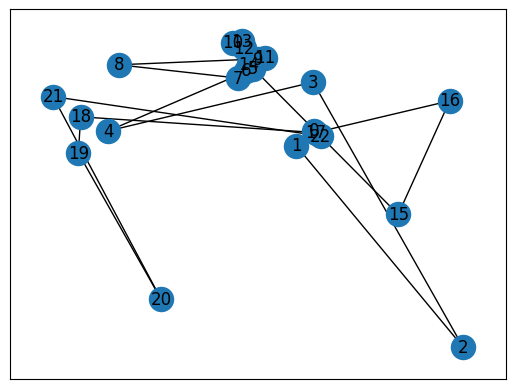

In [22]:
# create calendar graph
G_calendar, pos_calendar = df_to_graph(races, "Round")
total_dist_km = total_graph_distance(G_calendar)
print(f"Total distance travelled in original calendar: {total_dist_km:.2f} km")
nx.draw_networkx(G_calendar, pos=pos_calendar)

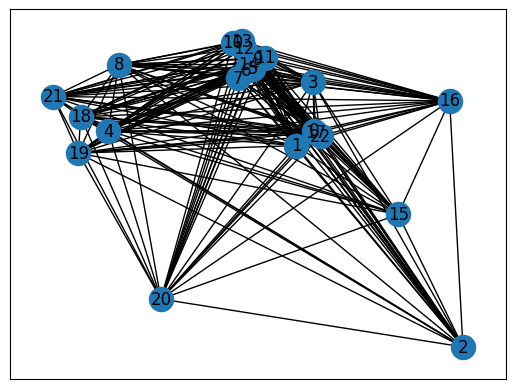

In [23]:
G_full, pos_full = df_to_graph(races)
nx.draw_networkx(G_full, pos=pos_full)


https://towardsdatascience.com/solving-travelling-salesperson-problems-with-python-5de7e883d847

In [37]:
import networkx as nx
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose


# convert graph for fitness function
distances = graph_to_distances(G_full)
length = races.shape[0]

# optimise graph
fitness_dists = mlrose.TravellingSales(distances=distances)
problem_fit = mlrose.TSPOpt(length=length, fitness_fn=fitness_dists, maximize=False)
best_state, best_fitness = mlrose.genetic_alg(problem_fit, random_state = 2, max_attempts=40, mutation_prob=0.25)

print('The best state found is: ', best_state)
print('The fitness at the best state is: ', best_fitness)

races.loc[best_state, "optimal_round"] = range(length)

Total distance travelled in original calendar: 100498.85 km


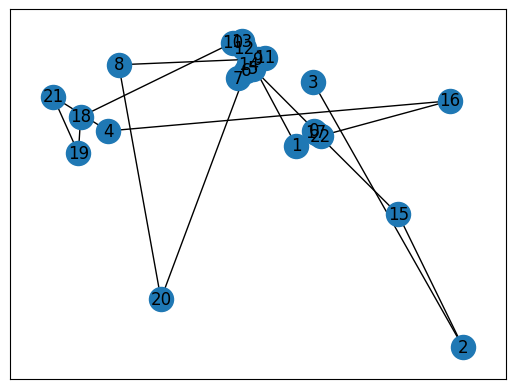

In [39]:
# create optimised graph
G_optimised, pos_optimised = df_to_graph(races, "optimal_round")
total_dist_km = total_graph_distance(G_optimised)
print(f"Total distance travelled in original calendar: {total_dist_km:.2f} km")
nx.draw_networkx(G_optimised, pos=pos_optimised)